# Develop Model

In this noteook, we will go through the steps to load the ResNet152 model, pre-process the images to the required format and call the model to find the top predictions.

In [1]:
from resnet152 import ResNet152
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np
from PIL import Image

Using TensorFlow backend.


We first load the model which we imported from the resnet152 module.

In [2]:
%%time
model = ResNet152(weights='imagenet')

CPU times: user 14.9 s, sys: 1.03 s, total: 15.9 s
Wall time: 15.6 s


Here is the summary of the model.

In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_zeropadding (ZeroPadding2 (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9408        conv1_zeropadding[0][0]          
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
scale_conv

__________________________________________________________________________________________________
res4b5_relu (Activation)        (None, 14, 14, 1024) 0           res4b5[0][0]                     
__________________________________________________________________________________________________
res4b6_branch2a (Conv2D)        (None, 14, 14, 256)  262144      res4b5_relu[0][0]                
__________________________________________________________________________________________________
bn4b6_branch2a (BatchNormalizat (None, 14, 14, 256)  1024        res4b6_branch2a[0][0]            
__________________________________________________________________________________________________
scale4b6_branch2a (Scale)       (None, 14, 14, 256)  512         bn4b6_branch2a[0][0]             
__________________________________________________________________________________________________
res4b6_branch2a_relu (Activatio (None, 14, 14, 256)  0           scale4b6_branch2a[0][0]          
__________

Let's test our model with an image of a Lynx.

In [4]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Lynx_lynx_poing.jpg/220px-Lynx_lynx_poing.jpg

--2018-03-23 18:54:08--  https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Lynx_lynx_poing.jpg/220px-Lynx_lynx_poing.jpg
Resolving upload.wikimedia.org... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27183 (27K) [image/jpeg]
Saving to: ‘220px-Lynx_lynx_poing.jpg.1’

220px-Lynx_lynx_poi 100%[===================>]  26.55K  --.-KB/s    in 0.01s   

2018-03-23 18:54:08 (2.56 MB/s) - ‘220px-Lynx_lynx_poing.jpg.1’ saved [27183/27183]



(220, 330)


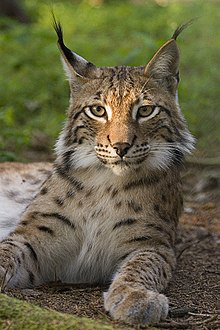

In [6]:
img_path = '220px-Lynx_lynx_poing.jpg'
print(Image.open(img_path).size)
Image.open(img_path)

Below, we load the image by resizing to (224, 224) and then preprocessing using the methods from keras preprocessing and imagenet utilities.

In [7]:
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

Now, let's call the model on our image to predict the top 3 labels.

In [11]:
%%time
preds = model.predict(img)
print('Predicted:', decode_predictions(preds, top=3))

Predicted: [[('n02127052', 'lynx', 0.99284911), ('n02124075', 'Egyptian_cat', 0.002332272), ('n02123159', 'tiger_cat', 0.0017122929)]]
CPU times: user 79.6 ms, sys: 0 ns, total: 79.6 ms
Wall time: 106 ms


The top guess is Lynx with 99.2%.